In [1]:
%matplotlib inline

In [2]:
import pickle as pkl
import pandas as pd
from datetime import  datetime, timedelta
from copy import copy

from core import  do_simulation
from helpers import Params, plot_total, T
from const import  STATE

In [3]:
p0_time = pkl.load(open('output/p0_time.pkl', 'rb'))
lockdown_time = T('23/01/2020')

In [4]:
p0_time

datetime.datetime(2019, 11, 29, 0, 0)

In [5]:
bed_info_raw = [
    (p0_time, 3000), # 3000),
    (T('25/01/2020'), 1000), # 4000),    
    (T('31/01/2020'), 6000), # 10000),
    (T('04/02/2020'), 1000), #  11000),
    (T('07/02/2020'), 2000), # 13000)
    (T('11/02/2020'), 6000),  # 19000
    (T('17/02/2020'), 11000),  # 28000
    (T('21/02/2020'), 11000),  # 39000
]

# number of new beds at  some days
bed_info = [((d-p0_time).days, n) for d, n in bed_info_raw]
print(bed_info)

[(0, 3000), (57, 1000), (63, 6000), (67, 1000), (70, 2000), (74, 6000), (80, 11000), (84, 11000)]


In [6]:
params_before = pkl.load(
    open('output/params_before_lockdown.pkl', 'rb')
)

params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [7]:
days_before_ld  = (lockdown_time -  p0_time).days
days_before_ld

55

In [8]:
total_days = 360

In [9]:
params = Params(
    total_population=params_before.total_population,
    initial_num_E=params_before.initial_num_E,
    initial_num_I=params_before.initial_num_I,
    initial_num_M=params_before.initial_num_M,    
    alpha=[(0, params_before.alpha), (days_before_ld, params_after.alpha)],
    beta=[(0, params_before.beta), (days_before_ld, params_after.beta)],
    stages=[days_before_ld]
)

total, _, _, r0_info = do_simulation(total_days, bed_info, params, verbose=0)

100%|██████████| 360/360 [01:12<00:00,  4.95it/s]


In [10]:
p0_time + timedelta(days=total_days)

datetime.datetime(2020, 11, 23, 0, 0)

/home/cloud-user/code/covid-19/helpers.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E = process_state('E')
/home/cloud-user/code/covid-19/helpers.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I = process_state('I')
/home/cloud-user/code/covid-19/helpers.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user

['29/11/19' '09/02/20' '21/04/20' '02/07/20' '12/09/20' '23/11/20']


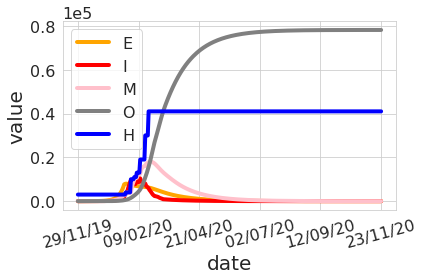

In [51]:
from helpers import plot_total
fig, ax = plot_total(total, p0_time, total_days)
fig.savefig('figs/start2end.pdf')

In [12]:
df = pd.DataFrame.from_dict({
    'date': pd.date_range(p0_time, p0_time+timedelta(days=total_days)), 
    'S': total[:, STATE.S],
    'E': total[:, STATE.E], 
    'I': total[:, STATE.I], 
    'M': total[:, STATE.M], 
    'O': total[:, STATE.O],
    'H': total[:, STATE.H]}    
)
df.to_csv('output/tbl/nov-29-to-end.csv', index=None)